# Make estimates

Text(0.5, 1.0, '$\\frac{\\mathrm{delta\\_degree\\_Celsius}}{\\mathrm{second}}$')

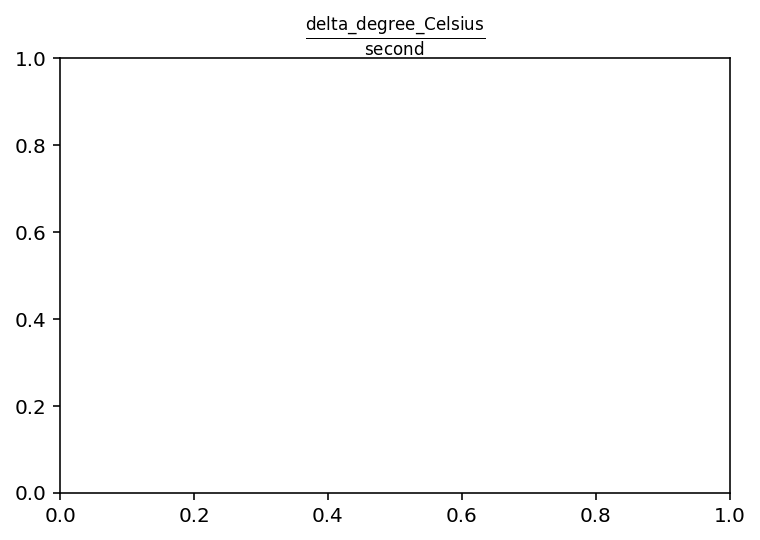

In [2]:
import cf_xarray.units
from pint import application_registry as ureg

u = ureg.Unit("degC s-1")
import matplotlib.pyplot as plt

plt.figure()
plt.title(f"${u:L}$")

In [1]:
%load_ext watermark
%matplotlib inline

import glob

import cf_xarray as cfxr
import dcpy
import distributed
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import tqdm
import xgcm
from IPython.display import Image

import xarray as xr
from xarray.tests import raise_if_dask_computes

%aimport eddydiff
ed = eddydiff

xr.set_options(keep_attrs=True)

plt.rcParams["figure.dpi"] = 140
plt.rcParams["savefig.dpi"] = 200
plt.style.use("ggplot")


%watermark -iv
xr.DataArray([1.0])

tqdm       : 4.62.3
eddydiff   : 0.1
distributed: 2021.12.0
cf_xarray  : 0.6.3
scipy      : 1.7.3
dcpy       : 0.1
matplotlib : 3.5.1
xarray     : 0.10.3+dev29.ga8e0be8d1
xgcm       : 0.6.0
numpy      : 1.22.0



<xarray.DataArray (dim_0: 1)>
array([1.])
Dimensions without coordinates: dim_0

In [ ]:
client.close()

In [3]:
if "client" in locals():
    client.cluster.close()
    client.close()
client = distributed.Client(
    n_workers=6,
    threads_per_worker=2,
    env={"MKL_NUM_THREADS": 1, "NUMBA_NUM_THREADS": 1, "OMP_NUM_THREADS": 1},
)
client

distributed.diskutils - INFO - Found stale lock file and directory '/Users/dcherian/work/eddydiff/notebooks/dask-worker-space/worker-72wp3t5b', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 12,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57583,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 12
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57603,Total threads: 2
Dashboard: http://127.0.0.1:57605/status,Memory: 2.67 GiB
Nanny: tcp://127.0.0.1:57588,


## NATRE

In [4]:
natre = ed.natre.read_natre().load()  # .drop("depth")
bins = ed.sections.choose_bins(natre.gamma_n, depth_range=np.arange(150, 2001, 100))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [5]:
with raise_if_dask_computes():
    micro = ed.sections.bin_average_vertical(
        natre,  # .cf.stack({"latlon": ("latitude", "longitude")}).drop("latlon"),
        # .rename({"cast": "latlon"})
        # .unstack(),
        "neutral_density",
        bins,
    )

/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/pandas/core/arrays/interval.py:1388: RuntimeWarning: deallocating CachingFileManager(<class 'netCDF4._netCDF4.Dataset'>, '/Users/dcherian/work/eddydiff/datasets/natre_large_scale.nc', mode='r', kwargs={'clobber': True, 'diskless': False, 'persist': False, 'format': 'NETCDF4'}), but file is not already closed. This may indicate a bug.
  result[i] = Interval(left[i], right[i], closed)
distributed.utils_perf - WARNING - full garbage collections took 25% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 27% CPU time recently (threshold: 10%)
distributed.utils_perf - 

In [6]:
micro.load(scheduler=client)

/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/dask/array/reductions.py:538: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/dask/array/reductions.py:567: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/dask/array/reductions.py:567: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/dask/array/reductions.py:538: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/dask/array/reductions.py:567: RuntimeW

<xarray.Dataset>
Dimensions:             (gamma_n: 18, bound: 2)
Coordinates:
  * gamma_n             (gamma_n) float64 26.55 26.77 26.95 ... 27.95 27.96
  * bound               (bound) <U5 'lower' 'upper'
    num_obs             (gamma_n) int64 17472 19530 19237 ... 18916 10866 21047
    pres                (gamma_n) float64 198.6 297.5 ... 1.796e+03 1.878e+03
    reference_pressure  int64 1000
    gamma_n_bounds      (bound, gamma_n) float64 26.43 26.68 ... 27.95 27.97
Data variables: (12/30)
    chi                 (gamma_n) float64 2.04e-08 6.275e-09 ... 2.639e-10
    eps                 (gamma_n) float64 1.065e-09 6.135e-10 ... 1.245e-10
    hm                  (gamma_n) float64 93.54 103.5 101.8 ... 58.52 113.5
    theta               (gamma_n) float64 17.83 15.75 13.94 ... 4.551 4.334
    salt                (gamma_n) float64 36.58 36.18 35.88 ... 35.11 35.09
    dTdz_m              (gamma_n) float64 0.02476 0.01952 ... 0.002988 0.002671
    ...                  ...
    δKt_m               (gamma_n) float64 9.654e-08 2.335e-08 ... 1.036e-08
    δKρTz2              (gamma_n) float64 1.612e-09 6.484e-10 ... 2.325e-11
    δresidual           (gamma_n) float64 1.671e-09 1.221e-10 ... 1.335e-11
    δpres               (gamma_n) float64 46.77 51.75 50.89 ... 29.26 56.74
    chib2               (gamma_n) float64 1.02e-08 3.137e-09 ... 1.32e-10
    chib2_err           (gamma_n, bound) float64 9.232e-09 ... 1.473e-10
Attributes: (12/14)
    Conventions:           CF-1.6
    netcdf_version:        4
    project:               North Atlantic Tracer Release Experiment (NATRE)
    expocode:              32OC250_4
    cast_number:           3.0
    title:                 Microstructure profiler data from the ship Oceanus...
    ...                    ...
    longitude:             -30.723333333333333
    chief_scientist:       Raymond W. Schmitt
    data_originator:       Polzin
    institution:           WHOI
    data_assembly_center:  CCHDO
    commit:                eddydiff: 023b461dba1f1d5a1d785b4930a05b40483fa433...

In [50]:
micro_old = xr.load_dataset("../tests/estimates/natre.nc")
micro_old

<xarray.Dataset>
Dimensions:             (gamma_n: 18, bound: 2)
Coordinates:
  * gamma_n             (gamma_n) float64 26.55 26.77 26.95 ... 27.95 27.96
  * bound               (bound) object 'lower' 'upper'
    num_obs             (gamma_n) int64 17472 19530 19237 ... 18916 10866 21047
    pres                (gamma_n) float64 198.4 297.6 ... 1.796e+03 1.878e+03
    reference_pressure  int64 1000
    gamma_n_bounds      (bound, gamma_n) float64 26.43 26.68 ... 27.95 27.97
Data variables: (12/30)
    chi                 (gamma_n) float64 2.766e-08 7.215e-09 ... 2.755e-10
    eps                 (gamma_n) float64 1.198e-09 6.607e-10 ... 1.268e-10
    hm                  (gamma_n) float64 93.54 103.5 101.8 ... 58.52 113.5
    theta               (gamma_n) float64 17.83 15.75 13.94 ... 4.551 4.334
    salt                (gamma_n) float64 36.58 36.18 35.88 ... 35.11 35.09
    dTdz_m              (gamma_n) float64 0.02476 0.01952 ... 0.002988 0.002671
    ...                  ...
    δKt_m               (gamma_n) float64 1.1e-07 2.874e-08 ... 9.214e-09
    δKρTz2              (gamma_n) float64 1.658e-09 6.838e-10 ... 2.345e-11
    δresidual           (gamma_n) float64 2.424e-09 1.959e-10 ... 1.372e-11
    δpres               (gamma_n) float64 46.77 51.75 50.89 ... 29.26 56.74
    chib2               (gamma_n) float64 1.383e-08 3.607e-09 ... 1.377e-10
    chib2_err           (gamma_n, bound) float64 1.262e-08 ... 1.503e-10
Attributes: (12/14)
    Conventions:           CF-1.6
    netcdf_version:        4
    project:               North Atlantic Tracer Release Experiment (NATRE)
    expocode:              32OC250_4
    cast_number:           3.0
    title:                 Microstructure profiler data from the ship Oceanus...
    ...                    ...
    longitude:             -30.723333333333333
    chief_scientist:       Raymond W. Schmitt
    data_originator:       Polzin
    institution:           WHOI
    data_assembly_center:  CCHDO
    commit:                eddydiff: 0a1efa9819d53e14fcd49449a434ac2a51640125...

In [51]:
xr.testing.assert_allclose(micro, micro_old, atol=0, rtol=1e-10)

AssertionError: Left and right Dataset objects are not close

Differing coordinates:
L   pres                (gamma_n) float64 198.6 297.5 ... 1.796e+03 1.878e+03
R   pres                (gamma_n) float64 198.4 297.6 ... 1.796e+03 1.878e+03
Differing data variables:
L   δeps                (gamma_n) float64 1.965e-10 6.918e-11 ... 1.198e-11
R   δeps                (gamma_n) float64 1.721e-10 6.716e-11 ... 1.139e-11
L   Kt_m_err            (gamma_n, bound) float64 3.153e-07 ... 5.978e-08
R   Kt_m_err            (gamma_n, bound) float64 4.485e-07 ... 6.079e-08
L   eps                 (gamma_n) float64 1.065e-09 6.135e-10 ... 1.245e-10
R   eps                 (gamma_n) float64 1.198e-09 6.607e-10 ... 1.268e-10
L   residual_err        (gamma_n, bound) float64 2.891e-09 ... 5.47e-11
R   residual_err        (gamma_n, bound) float64 5.069e-09 ... 5.921e-11
L   Krho_m              (gamma_n) float64 9.194e-06 7.083e-06 ... 1.271e-05
R   Krho_m              (gamma_n) float64 1.034e-05 7.628e-06 ... 1.293e-05
L   δresidual           (gamma_n) float64 1.671e-09 1.221e-10 ... 1.335e-11
R   δresidual           (gamma_n) float64 2.424e-09 1.959e-10 ... 1.372e-11
L   chi_err             (gamma_n, bound) float64 1.846e-08 ... 2.946e-10
R   chi_err             (gamma_n, bound) float64 2.523e-08 ... 3.006e-10
L   δKρTz2              (gamma_n) float64 1.612e-09 6.484e-10 ... 2.325e-11
R   δKρTz2              (gamma_n) float64 1.658e-09 6.838e-10 ... 2.345e-11
L   eps_err             (gamma_n, bound) float64 9.912e-10 ... 1.306e-10
R   eps_err             (gamma_n, bound) float64 1.126e-09 ... 1.329e-10
L   δKt_m               (gamma_n) float64 9.654e-08 2.335e-08 ... 1.036e-08
R   δKt_m               (gamma_n) float64 1.1e-07 2.874e-08 ... 9.214e-09
L   chib2               (gamma_n) float64 1.02e-08 3.137e-09 ... 1.32e-10
R   chib2               (gamma_n) float64 1.383e-08 3.607e-09 ... 1.377e-10
L   δchi                (gamma_n) float64 4.666e-09 8.743e-10 ... 5.177e-11
R   δchi                (gamma_n) float64 5.262e-09 1.082e-09 ... 4.476e-11
L   residual            (gamma_n) float64 4.562e-09 4.395e-10 ... 4.135e-11
R   residual            (gamma_n) float64 7.493e-09 7.021e-10 ... 4.549e-11
L   chi                 (gamma_n) float64 2.04e-08 6.275e-09 ... 2.639e-10
R   chi                 (gamma_n) float64 2.766e-08 7.215e-09 ... 2.755e-10
L   δKrho_m             (gamma_n) float64 2.545e-06 1.652e-06 ... 2.973e-06
R   δKrho_m             (gamma_n) float64 2.6e-06 1.74e-06 ... 2.994e-06
L   KρTz2               (gamma_n) float64 5.636e-09 2.698e-09 ... 9.062e-11
R   KρTz2               (gamma_n) float64 6.336e-09 2.905e-09 ... 9.225e-11
L   chib2_err           (gamma_n, bound) float64 9.232e-09 ... 1.473e-10
R   chib2_err           (gamma_n, bound) float64 1.262e-08 ... 1.503e-10
L   Krho_m_err          (gamma_n, bound) float64 6.649e-06 ... 1.568e-05
R   Krho_m_err          (gamma_n, bound) float64 7.737e-06 ... 1.593e-05
L   Kt_m                (gamma_n) float64 4.119e-07 1.608e-07 ... 4.941e-08
R   Kt_m                (gamma_n) float64 5.586e-07 1.848e-07 ... 5.158e-08
L   pres_err            (gamma_n, bound) float64 151.8 245.3 ... 1.935e+03
R   pres_err            (gamma_n, bound) float64 151.6 245.1 ... 1.935e+03
L   KρTz2_err           (gamma_n, bound) float64 4.024e-09 ... 1.139e-10
R   KρTz2_err           (gamma_n, bound) float64 4.678e-09 ... 1.157e-10

In [52]:
micro_old.attrs

{'Conventions': 'CF-1.6',
 'netcdf_version': '4',
 'project': 'North Atlantic Tracer Release Experiment (NATRE)',
 'expocode': '32OC250_4',
 'cast_number': 3.0,
 'title': 'Microstructure profiler data from the ship Oceanus with cruise dates 1992-03-25 to 1992-04-22.',
 'time': 'Mar-28-1992',
 'latitude': 27.533166666666666,
 'longitude': -30.723333333333333,
 'chief_scientist': 'Raymond W. Schmitt',
 'data_originator': 'Polzin',
 'institution': 'WHOI',
 'data_assembly_center': 'CCHDO',
 'commit': 'eddydiff: 0a1efa9819d53e14fcd49449a434ac2a51640125 |  dcpy: 2cc26efb6cb6323934e0b37b6ff82379491dc01f'}

In [53]:
# micro.pres.attrs["bounds"] = "pres_err"
# micro  # .load(scheduler=client)
micro.to_netcdf("../tests/estimates/natre.nc")

distributed.nanny - WARNING - Restarting worker
distributed.worker - WARNING - Heartbeat to scheduler failed
Traceback (most recent call last):
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/distributed/worker.py", line 1254, in heartbeat
    response = await retry_operation(
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/distributed/utils_comm.py", line 385, in retry_operation
    return await retry(
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/distributed/utils_comm.py", line 370, in retry
    return await coro()
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/distributed/core.py", line 883, in send_recv_from_rpc
    comm = await self.pool.connect(self.addr)
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-packages/distributed/core.py", line 1071, in connect
    raise exc
  File "/Users/dcherian/mambaforge/envs/eddydiff/lib/python3.9/site-package